In [9]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Daily+temperature+data.csv')
data = data.set_index('Date')
data.head()

,Temperature(Min)
Date,
01-01-2017,14.3
01-02-2017,17.4
01-03-2017,18.5
01-04-2017,16.8
01-05-2017,11.5


In [18]:
data.isnull().sum()

Temperature(Min)    0
dtype: int64

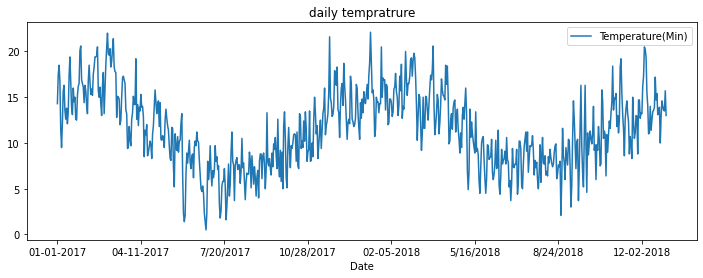

In [3]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('daily tempratrure')
plt.show(block=False)

In [4]:
train_length = 511
train = data[0:train_length]
test = data[train_length:]

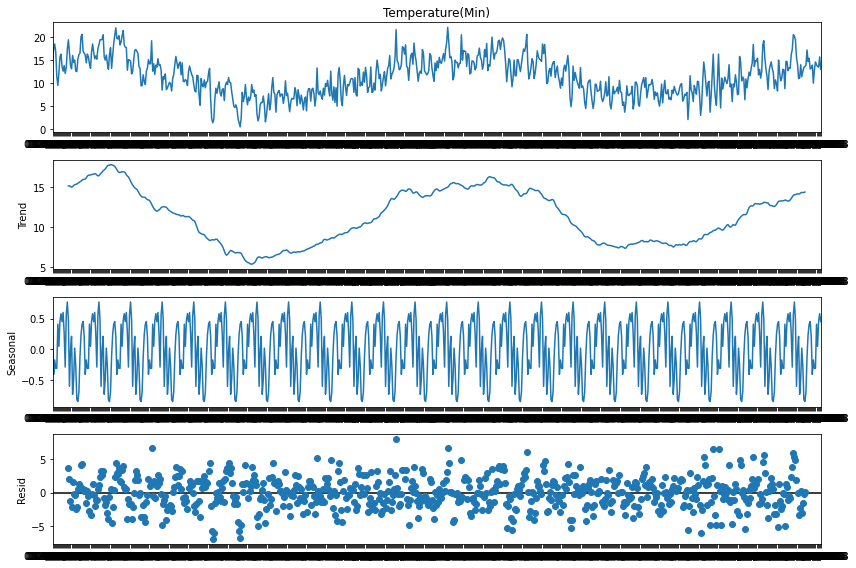

In [15]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data["Temperature(Min)"],freq=30, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

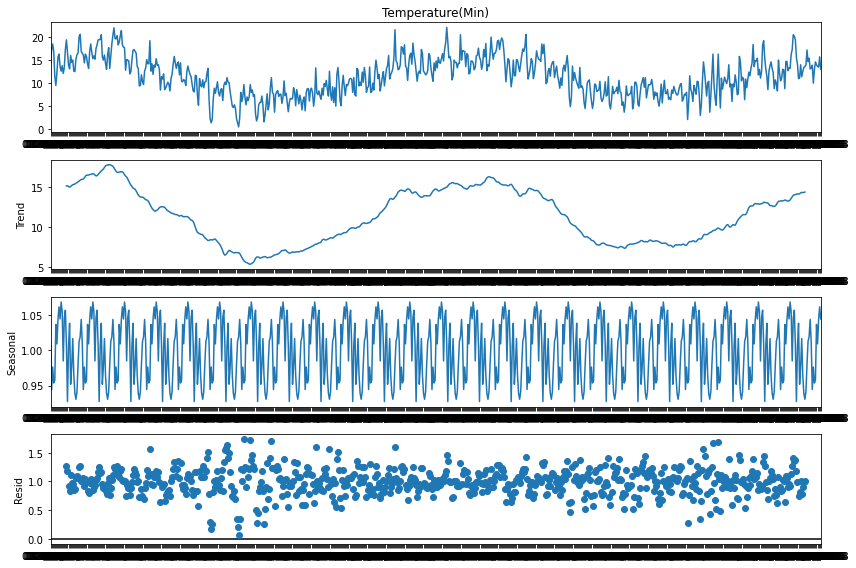

In [16]:
decomposition = sm.tsa.seasonal_decompose(data['Temperature(Min)'], freq=30,model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

In [26]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level=0.2)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast()
y_hat_ses
#train['Temperature(Min)']

,Temperature(Min),ses_forecast
Date,,
5/27/2018,8.2,NaN
5/28/2018,6.1,NaN
5/29/2018,4.5,NaN
5/30/2018,6.1,NaN
5/31/2018,9.8,NaN
...,...,...
12/27/2018,14.0,NaN
12/28/2018,13.6,NaN
12/29/2018,13.5,NaN


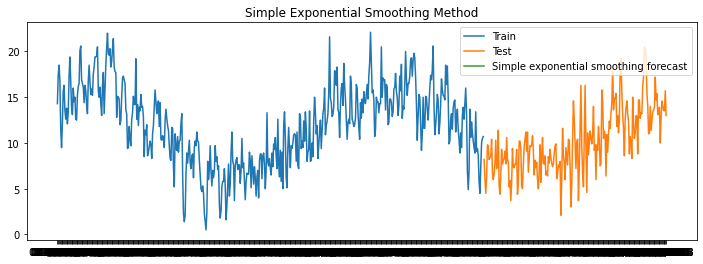

In [7]:
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [10]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_ses['ses_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [45]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']) ,seasonal_periods=30 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6742741125490677, 'smoothing_trend': 0.0, 'smoothing_seasonal': 0.0, 'damping_trend': nan, 'initial_level': 12.402040690906082, 'initial_trend': -0.009869855645729075, 'initial_seasons': array([3.06524553, 2.57081322, 2.59242197, 3.10234396, 2.57697483,
       2.39862505, 2.50849289, 3.15950387, 3.31056536, 2.99100143,
       3.07145347, 2.81661469, 1.82063122, 2.77167757, 2.96981511,
       2.99731795, 1.9483591 , 2.75825474, 2.45630426, 1.77788142,
       1.99952203, 2.83287857, 1.66041708, 0.96436836, 1.82716626,
       1.83114383, 2.09982714, 2.71557102, 3.23126453, 3.24706643]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


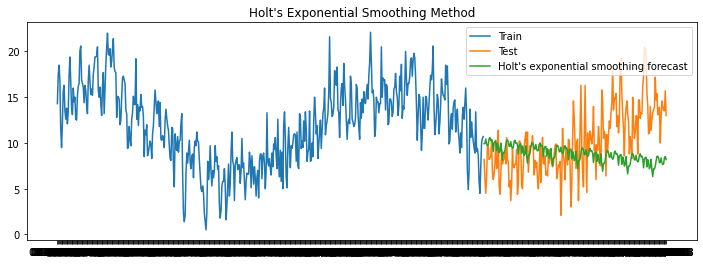

In [46]:
plt.figure(figsize=(12,4))
plt.plot( train['Temperature(Min)'], label='Train')
plt.plot(test['Temperature(Min)'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [48]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['holt_forecast'])/test['Temperature(Min)'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Holt Winters' additive method,4.14,34.36
